In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...


In [ ]:
!conda install -c bioconda cooltools

In [ ]:
import cooltools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp -R /content/drive/MyDrive/data_for_HiC_HSE /content/

In [ ]:
!mv /content/data_for_HiC_HSE/HiC_hESC_merged.hg38.mapq_30.10000.mcool /content

mv: cannot remove '/content/data_for_HiC_HSE/HiC_hESC_merged.hg38.mapq_30.10000.mcool': Operation not permitted


In [ ]:
!mv /content/data_for_HiC_HSE/Bg3_merged.dm3.mapq_30.1000.mcool /content

mv: cannot remove '/content/data_for_HiC_HSE/Bg3_merged.dm3.mapq_30.1000.mcool': Operation not permitted


In [ ]:
!pip3 install mustache-hic

In [ ]:
!pip install matplotlib==3.1.3

In [ ]:
from cooltools import insulation
import cooltools.lib.plotting
import numpy as np

In [ ]:
%%bash 
pip install numpy pysam cython
pip install pairtools
conda install -c bioconda bwa
conda install -c bioconda samtools
pip install cooler
pip  install pysam


In [ ]:
import pysam
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import bioframe
import cooler

### 2

In [ ]:
resolution = 40000
clr = cooler.Cooler('/content/HiC_hESC_merged.hg38.mapq_30.10000.mcool::resolutions/40000')

In [ ]:
windows = [3*resolution, 5*resolution, 10*resolution]
insulation_table = insulation(clr, windows, verbose=True)

INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


In [ ]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

(13500000.0, 19500000.0)

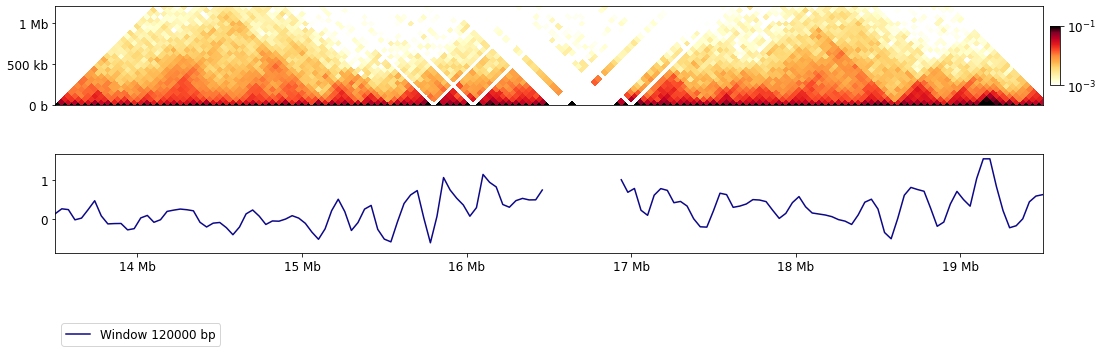

In [ ]:

plt.rcParams['font.size'] = 12

start = 13_500_000
end = start+ 50*windows[0]
region = ('chr1', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

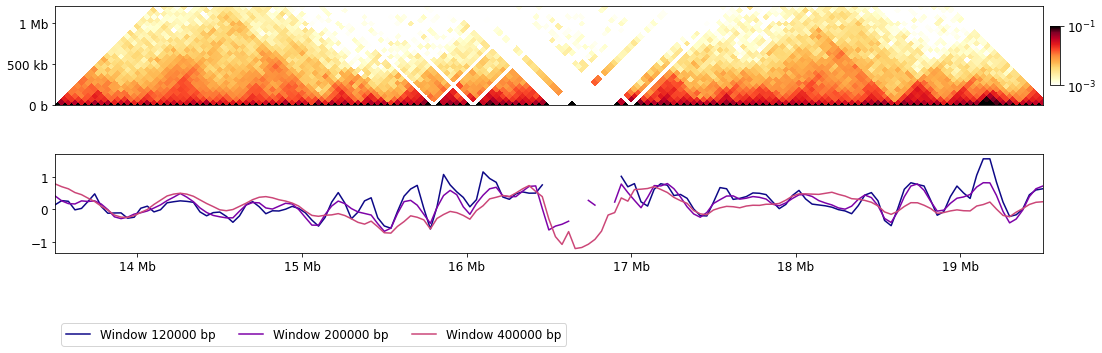

In [ ]:
for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);
f

(13500000.0, 19500000.0)

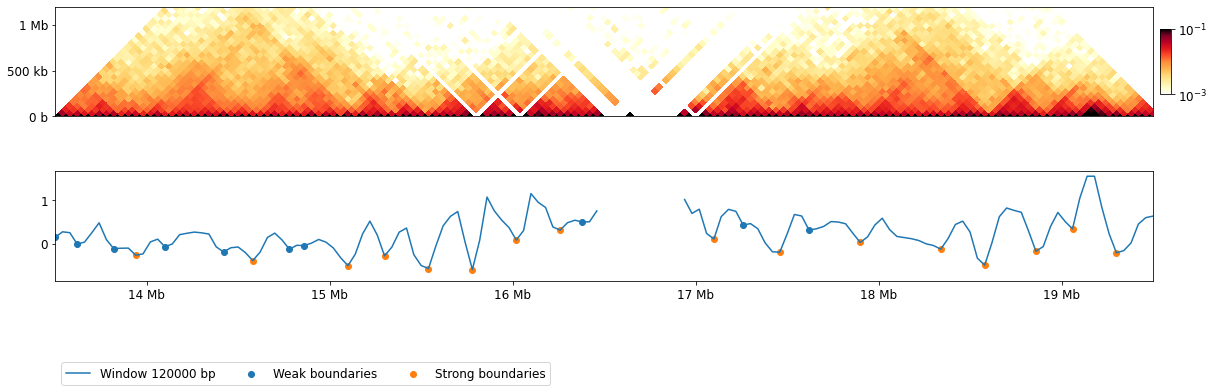

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(13500000.0, 19500000.0)

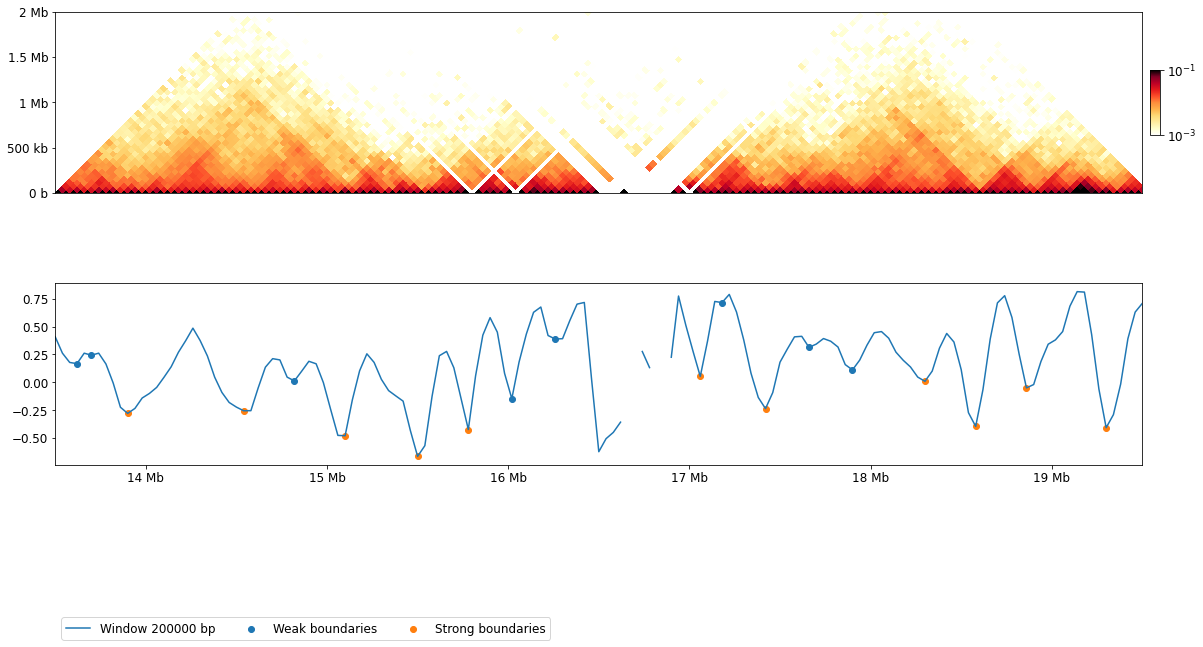

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[1])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[1]}'], label=f'Window {windows[1]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[1]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[1]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[1]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[1]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[1]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(13500000.0, 19500000.0)

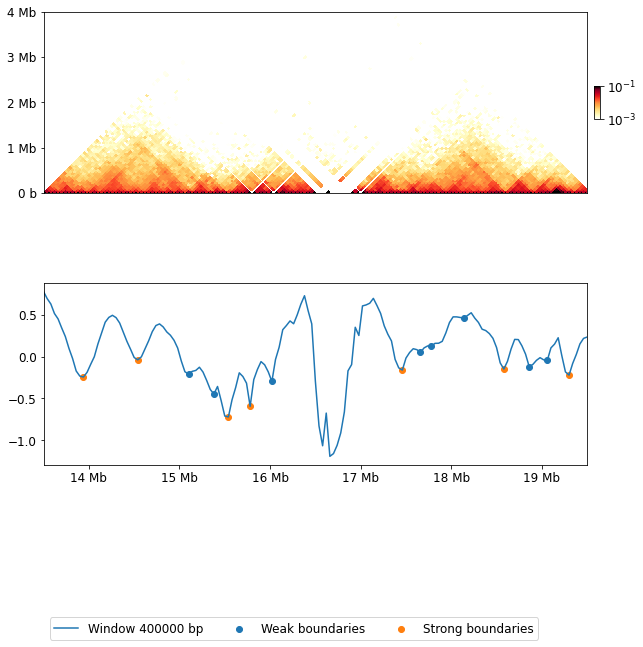

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[2])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[2]}'], label=f'Window {windows[2]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[2]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[2]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[2]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[2]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[2]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

In [ ]:
resolution = 20000
clr = cooler.Cooler('/content/HiC_hESC_merged.hg38.mapq_30.10000.mcool::resolutions/20000')
windows = [3*resolution, 5*resolution, 10*resolution]
insulation_table = insulation(clr, windows, verbose=True)

INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


In [ ]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

(13500000.0, 16500000.0)

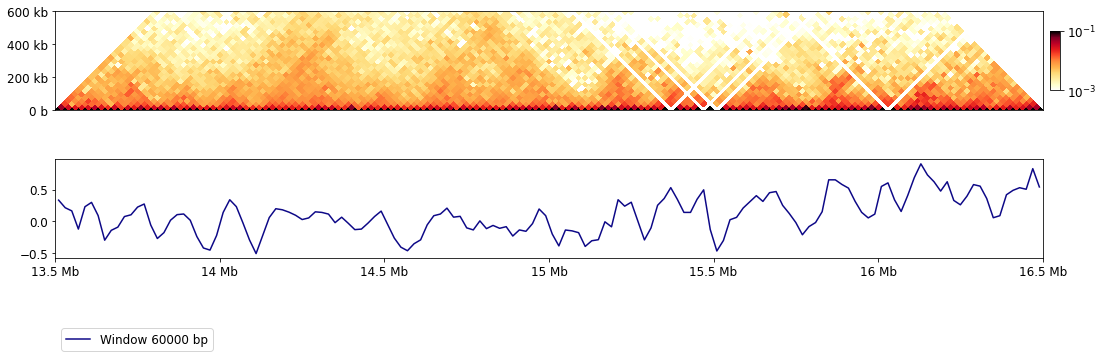

In [ ]:
plt.rcParams['font.size'] = 12

start = 13_500_000
end = start+ 50*windows[0]
region = ('chr1', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

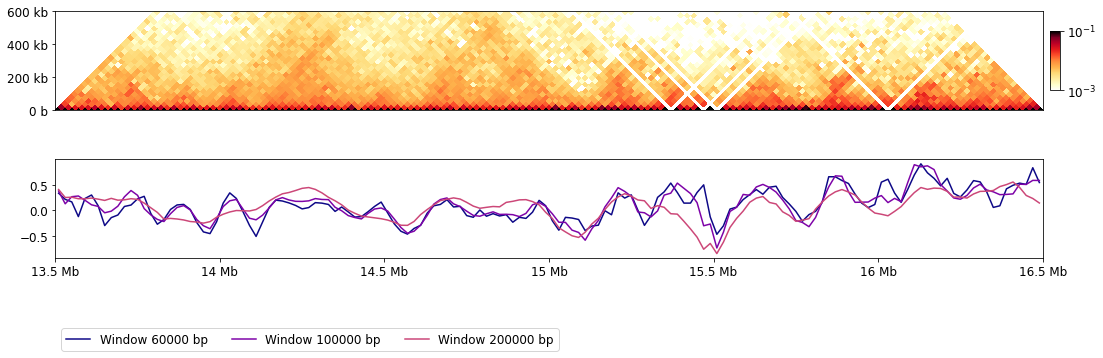

In [ ]:
for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);
f

(13500000.0, 16500000.0)

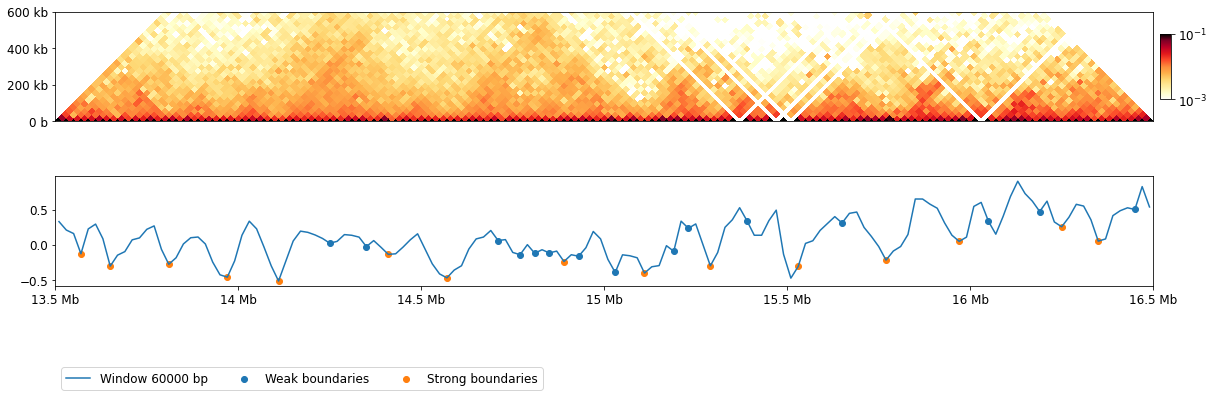

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(13500000.0, 16500000.0)

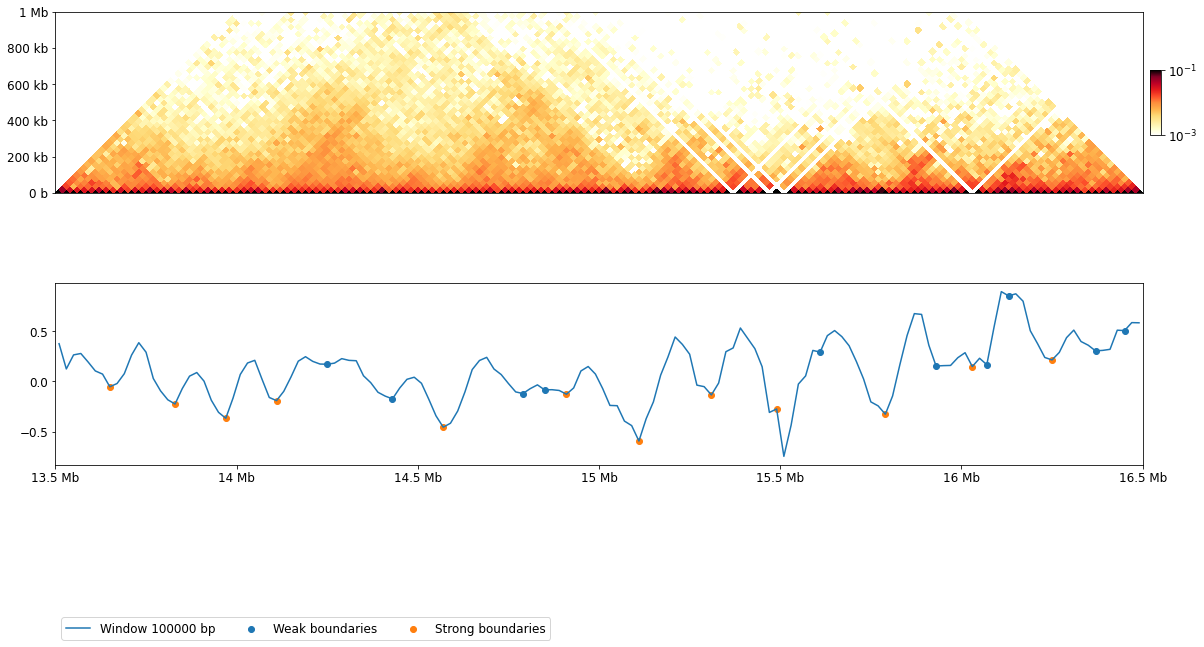

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[1])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[1]}'], label=f'Window {windows[1]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[1]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[1]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[1]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[1]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[1]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(13500000.0, 16500000.0)

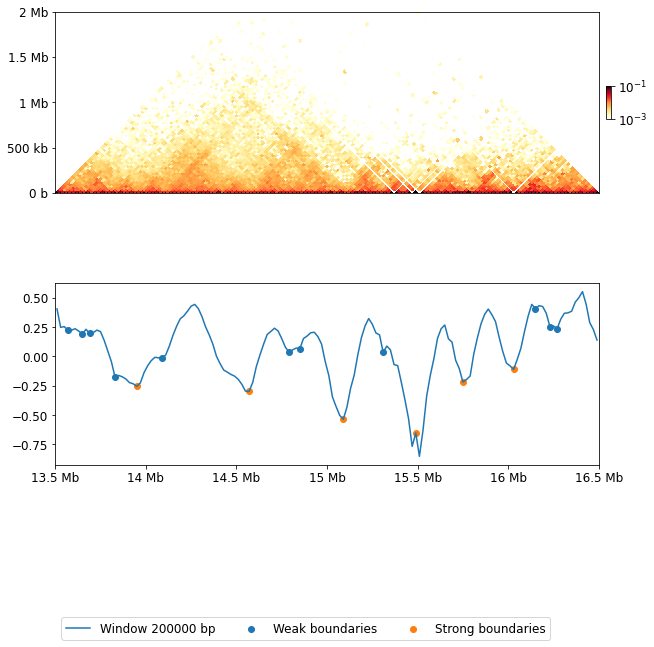

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[2])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[2]}'], label=f'Window {windows[2]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[2]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[2]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[2]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[2]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[2]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

### 3) Детекция петель. Получите разметку петель 2 инструментами (cooltools и mustache) для хромосомы 1 и разрешения 20kb. Сравните кол-во петель, полученное двумя способами. Отрисуйте средние хитмэпы вокруг полученных петель и определите, какой инструмент дает более яркий паттерн для "средней петли". Какой инструмент вы бы предпочли для дальнейшей работы? Отрисованные средние хитмэпы и комментарии включите в отчет. Средние хитмэпы получают следующим образом: для каждой петли "вырезаем" из карты контактов квадратный участок размера 21 на 21 (естественно, можно и 10 на 10, и 100 на 100 - на ваше усмотрение), в центре которого располагается петля (яркая точка на карте контактов). Очевидно, это вырезание осуществляется обычным slicing of numpy array для матрицы хромосомы 1. Подгружается эта матрица уже известным способом: clr.matrix(balance=True).fetch('chr1'), где clr - cool- файл, подгруженный с помощью комманды cooler.Cooler(path_to_mcool_file::resolutions/20000). Таких квадратных участков получается столько же, сколько петель. Их нужно усреднить по всем петлям, т е на выходе у вас также будет матрица размера 21 на 21. Поскольку в матрице контактов содержатся значения NaN, нужно использовать np.nanmean().

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches

In [ ]:
resolution = 20000
clr = cooler.Cooler('/content/HiC_hESC_merged.hg38.mapq_30.10000.mcool::resolutions/20000')

In [ ]:
def cooltools_loops(clr: cooler.api.Cooler) -> pd.DataFrame:
    # define genomic view that will be used to call dots and pre-compute expected

    # Use bioframe to fetch the genomic features from the UCSC.
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    hg38_cens = bioframe.fetch_centromeres('hg38')
    hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

    # Select only chromosomes that are present in the cooler.
    hg38_arms = hg38_arms.set_index("chrom").loc[['chr1']].reset_index()

    # intra-arm expected
    expected = cooltools.expected_cis(
        clr,
        view_df=hg38_arms,
        nproc=4,
    )

    return cooltools.dots(
        clr,
        expected=expected,
        view_df=hg38_arms,
        # how far from the main diagonal to call dots:
        max_loci_separation=10_000_000,
        nproc=4,
    )

In [ ]:
cooltools_loops(cooler.Cooler('/content/HiC_hESC_merged.hg38.mapq_30.10000.mcool::resolutions/20000')).to_csv("cooler_cooltools_dots.tsv", sep="\t", index=False)

INFO:root:Using recommended donut-based kernels with w=3, p=1 for binsize=20000
INFO:root: matrix 6174X6174 to be split into 625 tiles of 250X250.
INFO:root: tiles are padded (width=3) to enable convolution near the edges
INFO:root: matrix 6275X6275 to be split into 676 tiles of 250X250.
INFO:root: tiles are padded (width=3) to enable convolution near the edges
INFO:root:convolving 147 tiles to build histograms for lambda-bins
INFO:root:creating a Pool of 4 workers to tackle 147 tiles
INFO:root:Done building histograms in 25.813 sec ...
INFO:root:Determined thresholds for every lambda-bin ...
INFO:root:convolving 147 tiles to extract enriched pixels
INFO:root:creating a Pool of 4 workers to tackle 147 tiles
INFO:root:Done extracting enriched pixels in 25.769 sec ...
INFO:root:Begin post-processing of 11012 filtered pixels
INFO:root:preparing to extract needed q-values ...
INFO:root:clustering enriched pixels in region: chr1_p
INFO:root:detected 5533 clusters of 1.04+/-0.23 size
INFO:ro

In [ ]:
import matplotlib.patches as patches


In [ ]:
from cooltools.lib.numutils import fill_diag


In [ ]:
from matplotlib.ticker import EngFormatter

### xtnf

In [ ]:
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
  if y:
    ax.yaxis.set_major_formatter(bp_formatter)
  if x:
    ax.xaxis.set_major_formatter(bp_formatter)
    ax.xaxis.tick_bottom()
  if rotate:
    ax.tick_params(axis='x',rotation=45)

In [ ]:
'''
def rectangles_around_dots(dots_df, region, loc="upper", lw=1, ec="cyan", fc="none"):
  df_reg = bioframe.select(
      bioframe.select(dots_df, region, cols=("chrom1","start1","end1")),
      region,
      cols=("chrom2","start2","end2"),
      )
  rectangle_kwargs = dict(lw=lw, ec=ec, fc=fc)
# draw rectangular "boxes" around pixels called as dots in the "region":
  for s1, s2, e1, e2 in df_reg[["start1", "start2", "end1", "end2"]].itertuples(index=False):
    width1 = e1 - s1
    width2 = e2 - s2
    if loc == "upper":
      yield patches.Rectangle((s2, s1), width2, width1, **rectangle_kwargs)
    elif loc == "lower":
      yield patches.Rectangle((s1, s2), width1, width2, **rectangle_kwargs)
    else:
      raise ValueError("loc has to be uppper or lower")
'''

def rectangles_around_dots(dots_df, region, loc="upper", lw=1, ec="cyan", fc="none"):
  df_reg = bioframe.select(
      bioframe.select(dots_df, region, cols=("chrom1","start1","end1")),
      region,
      cols=("chrom2","start2","end2"),
      )
  rectangle_kwargs = dict(lw=lw, ec=ec, fc=fc)
  # draw rectangular "boxes" around pixels called as dots in the "region":
  for s1, s2, e1, e2 in df_reg[["start1", "start2", "end1", "end2"]].itertuples(index=False):
    width1 = e1 - s1
    width2 = e2 - s2
    if loc == "upper":
      yield patches.Rectangle((s2, s1), width2, width1, **rectangle_kwargs)
    elif loc == "lower":
      yield patches.Rectangle((s1, s2), width1, width2, **rectangle_kwargs)
    else:
      raise ValueError("loc has to be uppper or lower")


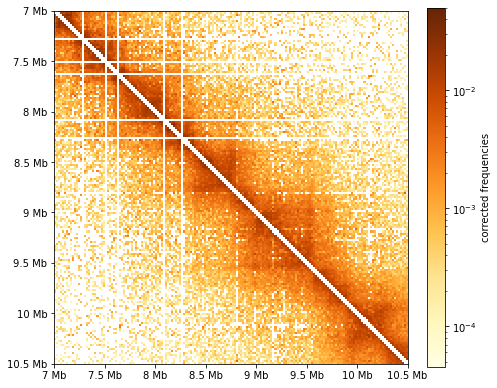

In [ ]:
 # define a region to look into as an example
start = 7000000
end = start + 3_500_000
region = ('chr17', start, end)

# heatmap kwargs
matshow_kwargs = dict(
    cmap='YlOrBr',
    norm=LogNorm(vmax=0.05),
    extent=(start, end, end, start)
)

# colorbar kwargs
colorbar_kwargs = dict(fraction=0.046, label='corrected frequencies')

# compute heatmap for the region
region_matrix = clr.matrix(balance=True).fetch(region)
for diag in [-1,0,1]:
  region_matrix = fill_diag(region_matrix, np.nan, i=diag)

# see viz.ipynb for details of heatmap visualization
f, ax = plt.subplots(figsize=(7,7))
im = ax.matshow( region_matrix, **matshow_kwargs)
format_ticks(ax, rotate=False)
plt.colorbar(im, ax=ax, **colorbar_kwargs)
# draw rectangular "boxes" around pixels called as dots in the "region":
for box in rectangles_around_dots(dots_df, region, lw=1.5):
  ax.add_patch(box)


In [ ]:
from itertools import chain


In [ ]:
dots_df_all = cooltools.dots(
clr,
expected=expected,
view_df=hg38_arms,
max_loci_separation=10_000_000,
clustering_radius=None, # None - implies no clustering
cluster_filtering=False, # ignored when clustering is off
nproc=4,
)


INFO:root:Using recommended donut-based kernels with w=3, p=1 for binsize=20000
INFO:root: matrix 6174X6174 to be split into 625 tiles of 250X250.
INFO:root: tiles are padded (width=3) to enable convolution near the edges
INFO:root: matrix 6275X6275 to be split into 676 tiles of 250X250.
INFO:root: tiles are padded (width=3) to enable convolution near the edges
INFO:root:convolving 147 tiles to build histograms for lambda-bins
INFO:root:creating a Pool of 4 workers to tackle 147 tiles
INFO:root:Done building histograms in 27.969 sec ...
INFO:root:Determined thresholds for every lambda-bin ...
INFO:root:convolving 147 tiles to extract enriched pixels
INFO:root:creating a Pool of 4 workers to tackle 147 tiles
INFO:root:Done extracting enriched pixels in 18.903 sec ...
INFO:root:Begin post-processing of 11012 filtered pixels
INFO:root:preparing to extract needed q-values ...


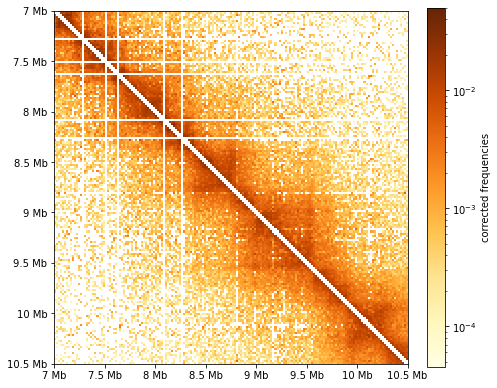

In [ ]:
f, ax = plt.subplots(figsize=(7,7))
# draw heatmap
im = ax.matshow(region_matrix, **matshow_kwargs)
format_ticks(ax, rotate=False)
plt.colorbar(im, ax=ax, **colorbar_kwargs)
# draw rectangular "boxes" around pixels called as dots in the "region":
for rect in chain(
    rectangles_around_dots(dots_df, region, lw=1.5), # clustered & filtered
    rectangles_around_dots(dots_df_all, region, loc="lower", ec="blue"), #unclustered
    ):
  ax.add_patch(rect)

###n xtnf

In [ ]:
! mustache -f '/content/HiC_hESC_merged.hg38.mapq_30.10000.mcool' -ch chr1 -r 20kb -pt 0.05 -o cooler_mustache_dots.tsv


In [ ]:
cooltools_dots = pd.read_csv("cooler_cooltools_dots.tsv", sep="\t")
cooltools_dots.shape

(620, 22)

In [ ]:
mustashe_dots = pd.read_csv("cooler_mustache_dots.tsv", sep="\t")
mustashe_dots.shape

(77, 8)

In [ ]:
region_matrix = clr.matrix(balance=True).fetch("chr1")
for diag in [-1,0,1]:
    region_matrix = fill_diag(region_matrix, np.nan, i=diag)

In [ ]:
def count_matrix(region_matrix: np.ndarray, dots_df: pd.DataFrame, binsize: int, n: int = 100) -> np.ndarray:
    n_s = n // 2
    n_e = n // 2
    if n % 2 != 0:
        n_e += 1

    ls = np.zeros((dots_df.shape[0], n, n))
    count_coord = lambda start,end: int((start + end) / (2 * binsize))
    for x in dots_df.itertuples():
        start1, start2 = count_coord(x.start1, x.end1), count_coord(x.start2, x.end2)
        ls[x.Index] = region_matrix[start1-n_s:start1+n_e,start2-n_s:start2+n_e]
    return np.nanmean(ls, axis=0)

In [ ]:
def count_matrix(region_matrix: np.ndarray, dots_df: pd.DataFrame, binsize: int, n: int = 100):
    n_s = n // 2
    n_e = n // 2

    mdot = np.zeros((dots_df.shape[0], n, n))
    count = lambda start,end: int((start + end) / (2 * binsize))
    for i in dots_df.itertuples():
        start1, start2 = count(i.start1, i.end1), count(i.start2, i.end2)
        mdot[i.Index] = region_matrix[start1-n_s:start1+n_e,start2-n_s:start2+n_e]
    return np.nanmean(mdot, axis=0)

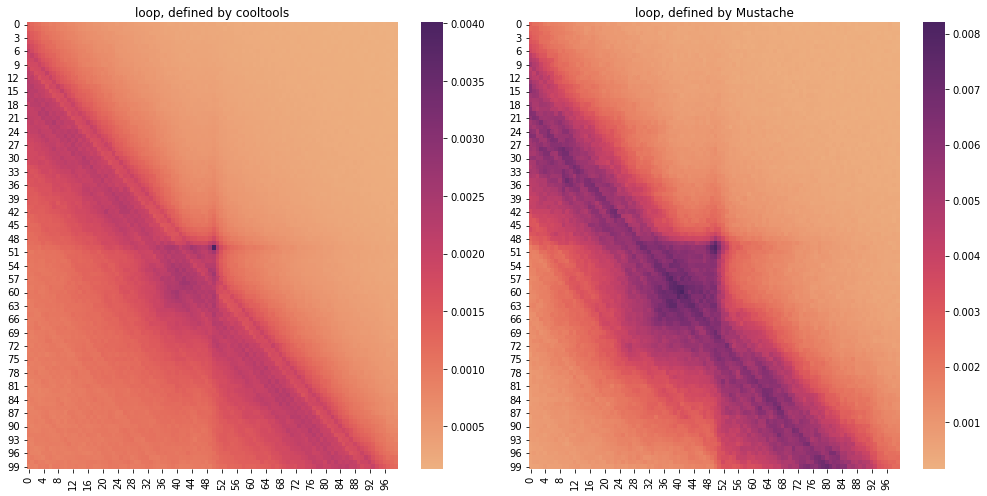

In [ ]:

f, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.heatmap(
    data=count_matrix(
        region_matrix=region_matrix,
        dots_df=cooltools_dots,
        binsize=clr.binsize,
    ),
    cmap='flare', 
    ax=ax[0],
)

sns.heatmap(
    data=count_matrix(region_matrix=region_matrix, dots_df=mustashe_dots.rename(
        columns={
            "BIN1_START": "start1",
            "BIN1_END": "end1",
            "BIN2_START": "start2",
            "BIN2_END": "end2",
        },
    ),
    binsize=clr.binsize),
    cmap='flare', 
    ax=ax[1],
)

ax[0].set_title("loop, defined by cooltools")
ax[1].set_title("loop, defined by Mustache")

plt.tight_layout()
plt.show()

In [ ]:
def count_matrix(region_matrix: np.ndarray, dots_df: pd.DataFrame, binsize: int, n: int = 21):
    n_s = n // 2
    n_e = (n // 2) + 1

    meanloop = np.zeros((dots_df.shape[0], n, n))
    coordinate = lambda start,end: int((start + end) / 2 / binsize)
    for dot in dots_df.itertuples():
        start1, start2 = coordinate(dot.start1, dot.end1), coordinate(dot.start2, dot.end2)
        meanloop[dot.Index] = region_matrix[start1-n_s:start1+n_e,start2-n_s:start2+n_e]
    return np.nanmean(meanloop, axis=0)

### 4) Получение разметки компартментов и построение saddle plot. Для двух организмов (мушка и человек) выберете какую-нибудь хромосому*, получите первый собственный вектор, характеризующий принадлежность к компартментам, и постройте saddle plot (просто отрисуйте полученную матрицу любым способом в питоне). Опишите, что отображено на saddle plot и какие различия в структуре компартментов наблюдаются у мушки и человека. Данные: Bg3_merged.dm3.mapq_30.1000.mcool (разрешение 20kb) - нервная ткань (Drosophila) HiC_hESC_merged.hg38.mapq_30.10000.mcool (разрешение 250kb) - hESC (человек) Для определения первого собственного вектора вам понадобится геном человека и плодовой мушки (hg38.fa и dm3.fa). Загрузите его самостоятельно на свой гугл-диск.

*Название хромосом в cool-файле смотрят следующим образом: clr.chromnames, где clr - cool/mcool - файл, подгруженный с помощью комманды cooler.Cooler(...)

ЧЕЛ

In [ ]:
!wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
!gunzip hg38.fa.gz

--2022-12-19 18:30:19--  https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 983659424 (938M) [application/x-gzip]
Saving to: ‘hg38.fa.gz’

hg38.fa.gz          100%[===================>] 938.09M  20.8MB/s    in 49s     

2022-12-19 18:31:08 (19.2 MB/s) - ‘hg38.fa.gz’ saved [983659424/983659424]



In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
resolution = 250000
clr = cooler.Cooler('/content/HiC_hESC_merged.hg38.mapq_30.10000.mcool::resolutions/250000')

In [ ]:
clr.chromnames

In [ ]:
bins = clr.bins()[:]
hg38_genome = bioframe.load_fasta('/content/hg38.fa');
## note the next command may require installing pysam
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], hg38_genome)
display(gc_cov)

In [ ]:
chr21 = gc_cov.loc[gc_cov['chrom'] == 'chr21']
chr21

In [ ]:
view_df = pd.DataFrame({'chrom': ['chr10'],
                        'start': 0,
                        'end': [clr.chromsizes.values[9]],
                        'name': ['chr10']}
                      )
display(view_df)

In [ ]:
cis_eigs = cooltools.eigs_cis(
                        clr,
                        gc_cov,
                        view_df=view_df,
                        n_eigs=3,
                        )

# cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
eigenvector_track = cis_eigs[1][['chrom','start','end','E1']]

In [ ]:
N_GROUPS=30
    
cvd = cooltools.expected_cis(
        clr=clr,view_df=view_df
)

interaction_sum, interaction_count =  cooltools.saddle(
        clr,
        cvd,
        eigenvector_track,
        'cis',
        n_bins=N_GROUPS,
        qrange=(0.01,0.99),
        view_df=view_df
)
saddle=np.log2(interaction_sum / interaction_count)### visualize the matrix to look at the saddle plot

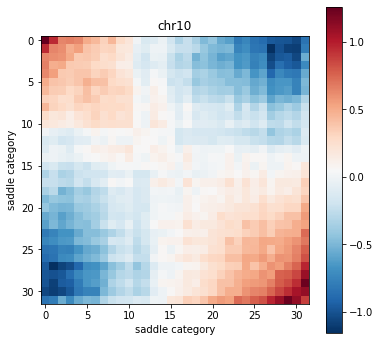

In [ ]:
plt.figure(figsize=(6,6))

im = plt.imshow(
    saddle,
    cmap='RdBu_r',
);
plt.xlabel("saddle category")
plt.ylabel("saddle category")
plt.title('chr10')
plt.colorbar(im);

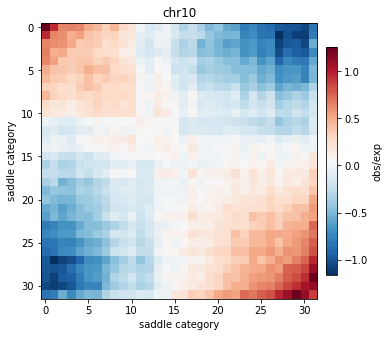

In [ ]:
plt.figure(figsize=(6,6))

im = plt.imshow(
    saddle,
    cmap='RdBu_r',
);
plt.xlabel("saddle category")
plt.ylabel("saddle category")
plt.title('chr10')
plt.colorbar(im, label='obs/exp', pad=0.025, shrink=0.7);

In [ ]:
view_df = pd.DataFrame({'chrom': ['chrX'],
                        'start': 0,
                        'end': [clr.chromsizes.values[22]],
                        'name': ['chrX']}
                      )
display(view_df)

In [ ]:
cis_eigs = cooltools.eigs_cis(
                        clr,
                        gc_cov,
                        view_df=view_df,
                        n_eigs=3,
                        )

# cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
eigenvector_track = cis_eigs[1][['chrom','start','end','E1']]

In [ ]:
N_GROUPS=30
    
cvd = cooltools.expected_cis(
        clr=clr,view_df=view_df
)

interaction_sum, interaction_count =  cooltools.saddle(
        clr,
        cvd,
        eigenvector_track,
        'cis',
        n_bins=N_GROUPS,
        qrange=(0.01,0.99),
        view_df=view_df
)
saddle=np.log2(interaction_sum / interaction_count)### visualize the matrix to look at the saddle plot

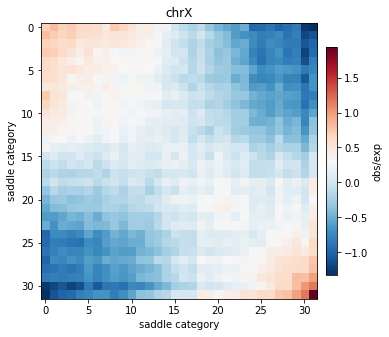

In [ ]:
plt.figure(figsize=(6,6))

im = plt.imshow(
    saddle,
    cmap='RdBu_r',
);
plt.xlabel("saddle category")
plt.ylabel("saddle category")
plt.title('chrX')
plt.colorbar(im, label='obs/exp', pad=0.025, shrink=0.7);

In [ ]:
!wget https://hgdownload.soe.ucsc.edu/goldenPath/dm3/bigZips/dm3.fa.gz
!gunzip dm3.fa.gz

--2022-12-19 19:11:32--  https://hgdownload.soe.ucsc.edu/goldenPath/dm3/bigZips/dm3.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51448764 (49M) [application/x-gzip]
Saving to: ‘dm3.fa.gz’

dm3.fa.gz           100%[===================>]  49.06M  13.0MB/s    in 3.8s    

2022-12-19 19:11:37 (13.0 MB/s) - ‘dm3.fa.gz’ saved [51448764/51448764]



In [ ]:
resolution = 25000
clr = cooler.Cooler('/content/Bg3_merged.dm3.mapq_30.1000.mcool::resolutions/25000')

In [ ]:
clr.chromnames

['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrM']

In [ ]:
bins = clr.bins()[:]
dm3_genome = bioframe.load_fasta('/content/dm3.fa');
## note the next command may require installing pysam
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], dm3_genome)
display(gc_cov)

,chrom,start,end,GC
0,chr2L,0,25000,0.376640
1,chr2L,25000,50000,0.411800
2,chr2L,50000,75000,0.393120
3,chr2L,75000,100000,0.388400
4,chr2L,100000,125000,0.408960
...,...,...,...,...
4814,chrX,22325000,22350000,0.366640
4815,chrX,22350000,22375000,0.379040
4816,chrX,22375000,22400000,0.413880
4817,chrX,22400000,22422827,0.372410


In [ ]:
view_df = pd.DataFrame({'chrom': ['chrX'],
                        'start': 0,
                        'end': [clr.chromsizes.values[5]],
                        'name': ['chrX']}
                      )
display(view_df)

,chrom,start,end,name
0,chrX,0,22422827,chrX


In [ ]:
cis_eigs = cooltools.eigs_cis(
                        clr,
                        gc_cov,
                        view_df=view_df,
                        n_eigs=3,
                        )

# cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
eigenvector_track = cis_eigs[1][['chrom','start','end','E1']]

/usr/local/lib/python3.8/site-packages/cooltools/lib/checks.py:550: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in track.groupby([track.columns[0]]):


In [ ]:
N_GROUPS=30
    
cvd = cooltools.expected_cis(
        clr=clr,view_df=view_df
)

interaction_sum, interaction_count =  cooltools.saddle(
        clr,
        cvd,
        eigenvector_track,
        'cis',
        n_bins=N_GROUPS,
        qrange=(0.01,0.99),
        view_df=view_df
)
saddle=np.log2(interaction_sum / interaction_count)### visualize the matrix to look at the saddle plot

/usr/local/lib/python3.8/site-packages/cooltools/lib/checks.py:550: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in track.groupby([track.columns[0]]):
/usr/local/lib/python3.8/site-packages/cooltools/lib/common.py:475: UserWarning: less than 50% of valid bins have been assigned a value
  warnings.warn("less than 50% of valid bins have been assigned a value")
/usr/local/lib/python3.8/site-packages/cooltools/lib/checks.py:550: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in track.groupby([track.columns[0]]):
/usr/local/lib/python3.8/site-packages/cooltools/api/saddle.py:89: RuntimeWarning: invalid value encount

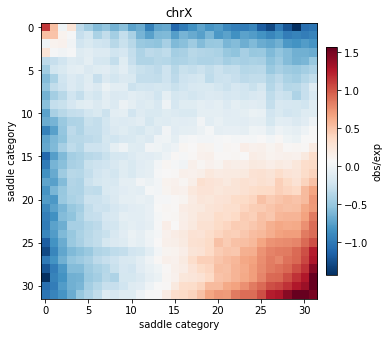

In [ ]:
plt.figure(figsize=(6,6))

im = plt.imshow(
    saddle,
    cmap='RdBu_r',
);
plt.xlabel("saddle category")
plt.ylabel("saddle category")
plt.title('chrX')
plt.colorbar(im, label='obs/exp', pad=0.025, shrink=0.7);

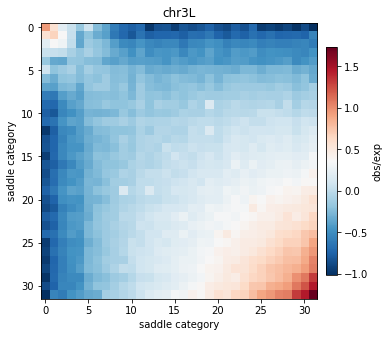

In [ ]:
plt.figure(figsize=(6,6))

im = plt.imshow(
    saddle,
    cmap='RdBu_r',
);
plt.xlabel("saddle category")
plt.ylabel("saddle category")
plt.title('chr3L')
plt.colorbar(im, label='obs/exp', pad=0.025, shrink=0.7);

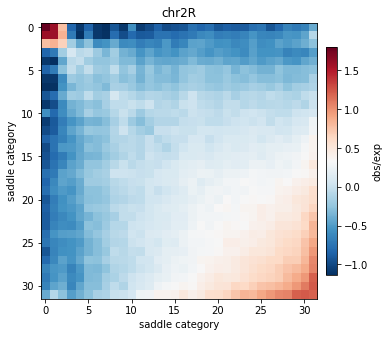

In [ ]:
plt.figure(figsize=(6,6))

im = plt.imshow(
    saddle,
    cmap='RdBu_r',
);
plt.xlabel("saddle category")
plt.ylabel("saddle category")
plt.title('chr2R')
plt.colorbar(im, label='obs/exp', pad=0.025, shrink=0.7);